In [1]:
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

shell_call("sudo apt install libgsl-dev")

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libgsl27 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  libgsl-dev libgsl27 libgslcblas0
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,351 kB of archives.
After this operation, 10.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgslcblas0 amd64 2.7.1+dfsg-3 [94.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgsl27 amd64 2.7.1+dfsg-3 [1,000 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgsl-dev amd64 2.7.1+dfsg-3 [1,257 kB]
Fetched 2,351 kB in 2s (1,532 kB/s)
Selecting previously unselected package libgslcblas0:amd64.
(Reading database ... 131015 files and directories currently installed.)
Preparing to unpack .../libgslcblas0_2.7.1

In [2]:
install.packages("copula")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gsl’, ‘ADGofTest’, ‘stabledist’, ‘mvtnorm’, ‘pcaPP’, ‘pspline’, ‘numDeriv’




In [3]:
library(copula)

In [145]:
data <- readRDS('var_11.rds')
names(data)

[1] "predictor"                 "predictor_DistrType"      
[3] "predictor_DistrParameters" "output"                   
[5] "output_DistrType"          "output_DistrParameters"

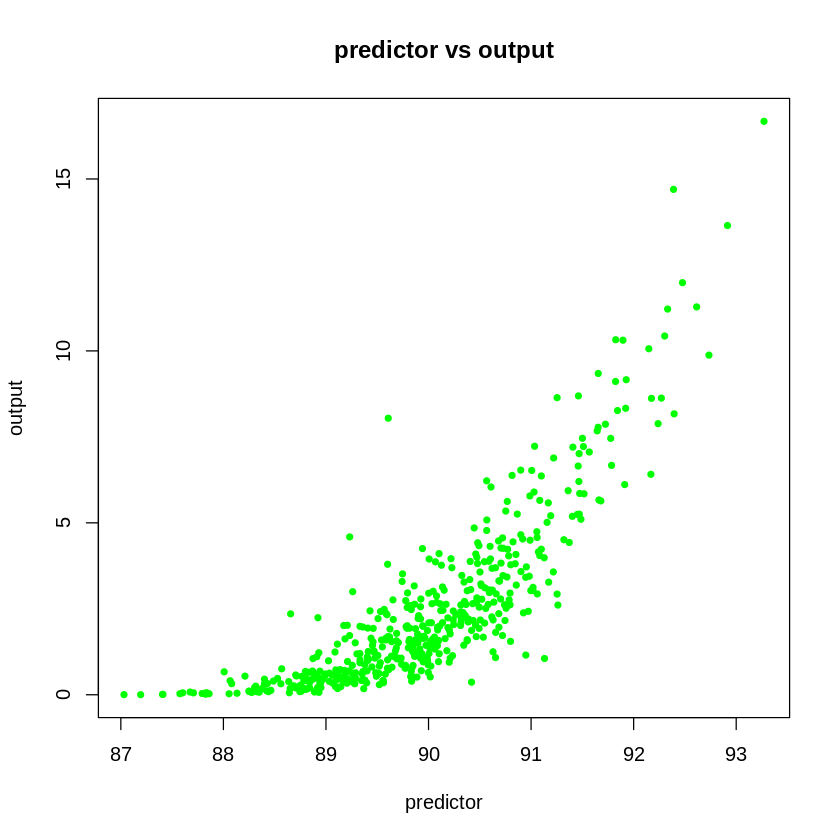

In [146]:
plot(data$predictor,data$output,main = 'predictor vs output', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')

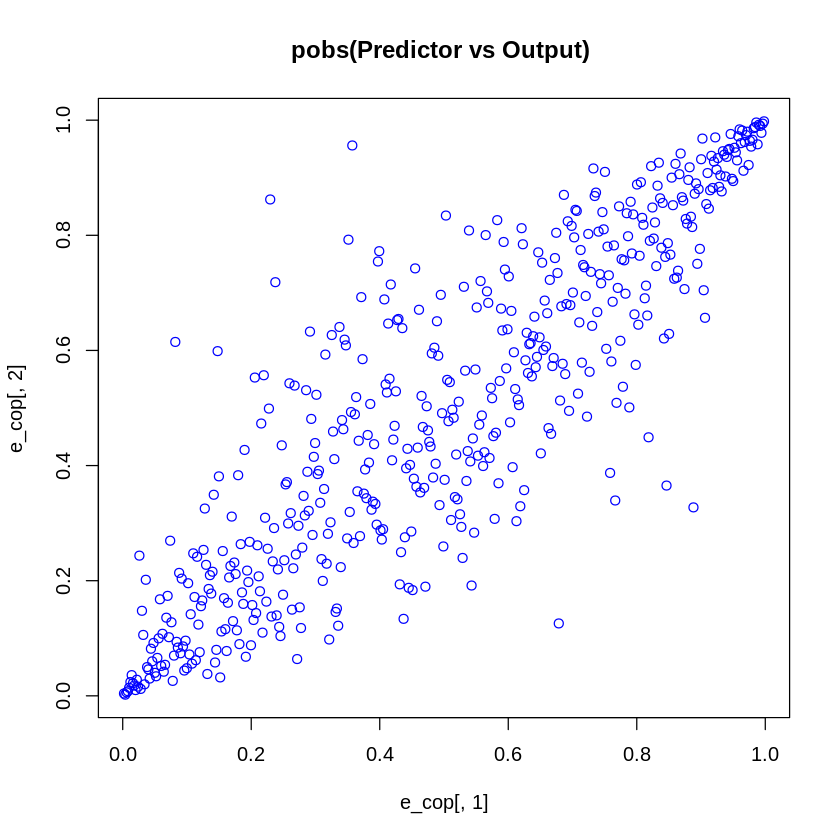

In [147]:
pred_out <- cbind(data$predictor,data$output)
e_cop <-pobs(pred_out)
plot(e_cop[,1],e_cop[,2],pch = 21,main ="pobs(Predictor vs Output) ",col = "blue")

In [148]:
#Normal copula
  normal_copula<-normalCopula(param=0,dim=2)
#Student copula
  t_copula <-ellipCopula(family = "t",param = 0,dim = 2)
#Frank copula
  Frank_copula<-frankCopula(param=5,dim=2)
#Clayton
  Clayton_copula<-claytonCopula(param=5,dim=2)

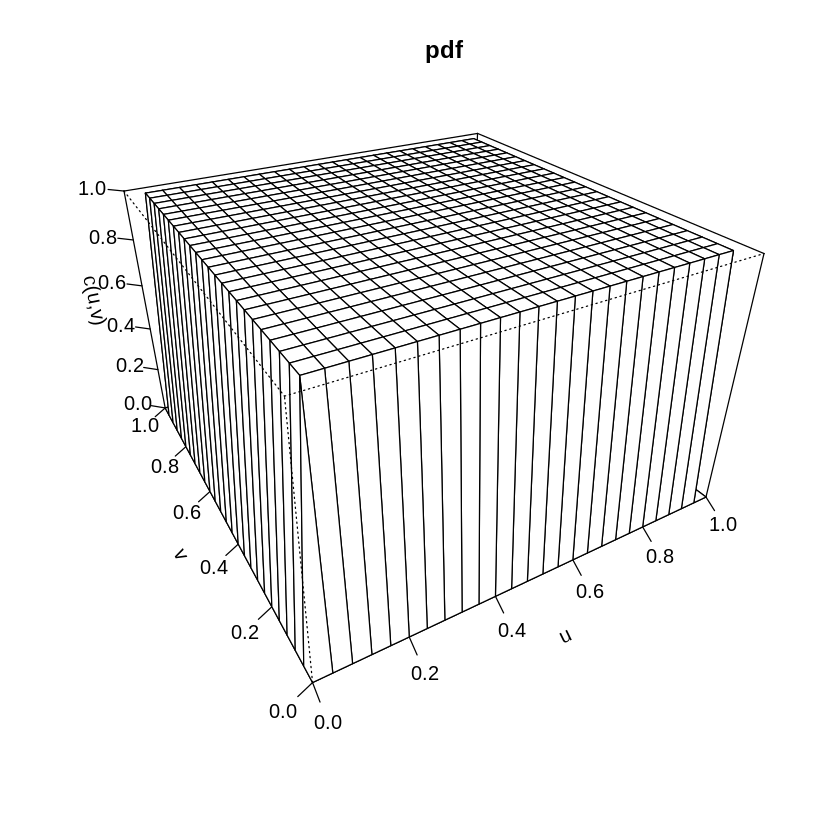

In [149]:
persp(normal_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

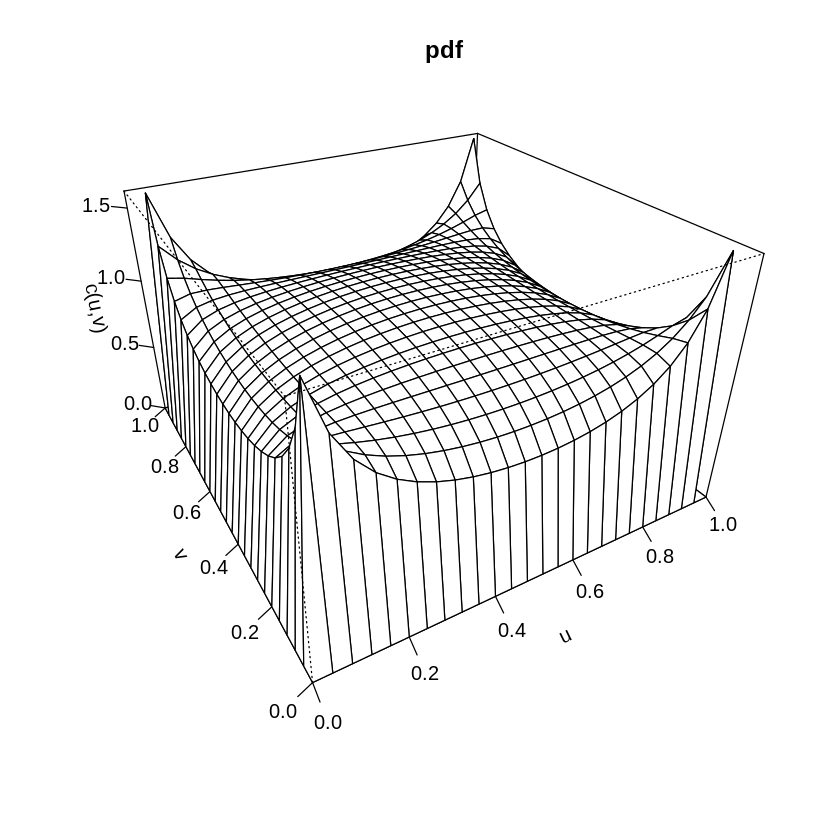

In [150]:
persp(t_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

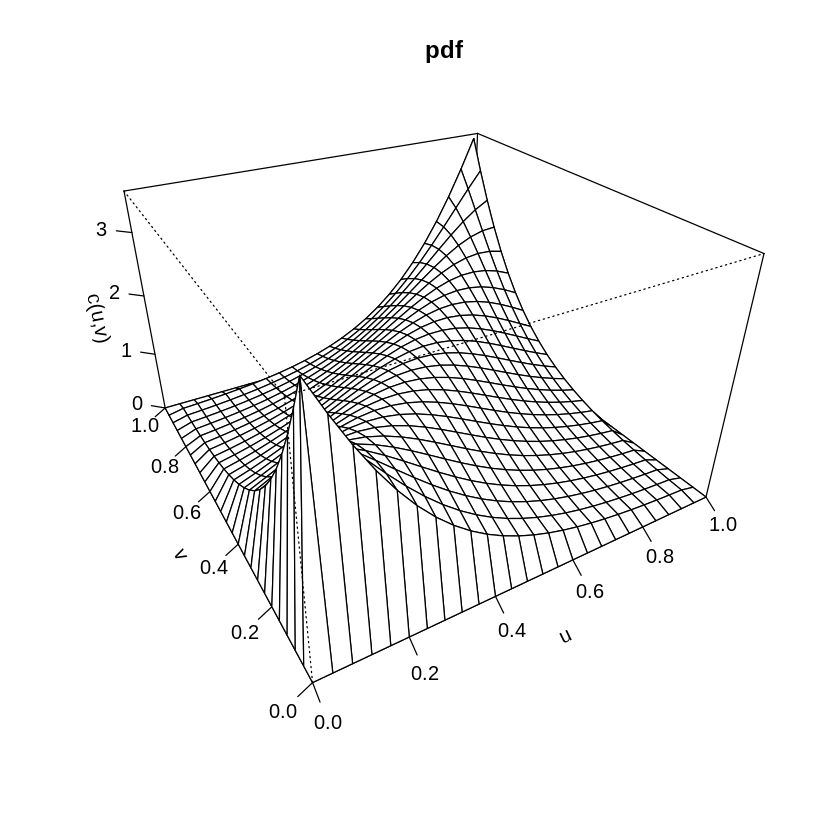

In [151]:
persp(Frank_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

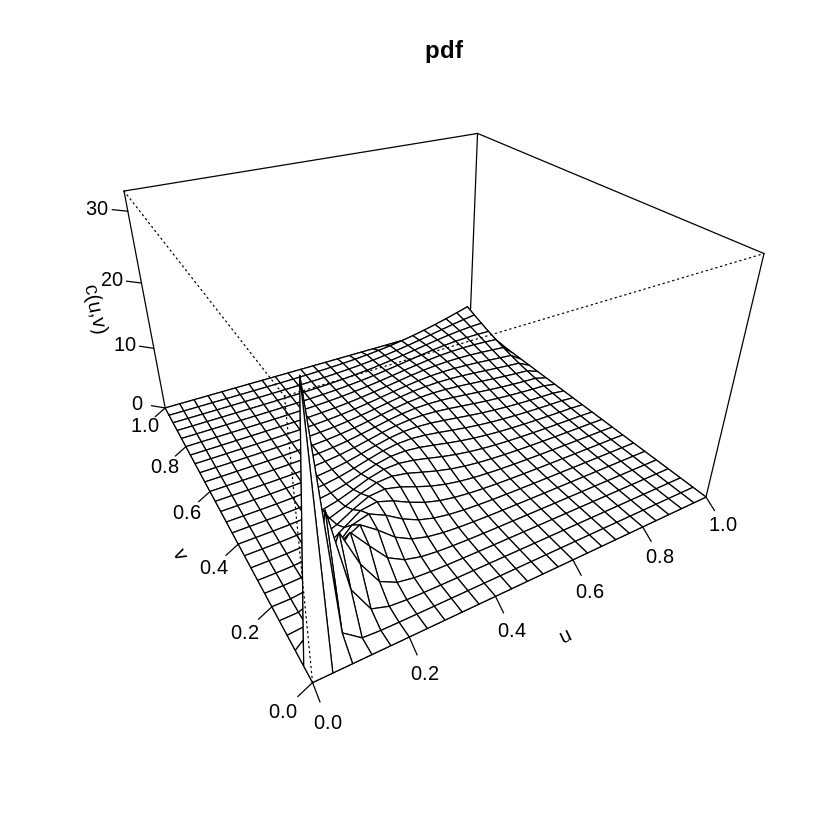

In [152]:
persp(Clayton_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

In [153]:
my.normal_copula.fit<-fitCopula(normal_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

parameters <- my.normal_copula.fit@copula@parameters
parameters

[1] 0.8977872

In [154]:
my.normal_copula.fit@loglik

[1] 405.2415

In [155]:
my.t_copula.fit<-fitCopula(t_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

t_parameters <- my.t_copula.fit@copula@parameters
my.t_copula

t-copula, dim. d = 2 
Dimension:  2 
Parameters:
  rho.1   = 0
  df      = 4

In [156]:
my.t_copula.fit@loglik

[1] 424.0902

In [157]:
my.Frank_copula.fit<-fitCopula(Frank_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

parameters <- my.Frank_copula.fit@copula@parameters
parameters

[1] 11.23108

In [158]:
my.Frank_copula.fit@loglik

[1] 356.7672

In [159]:
my.Clayton_copula.fit<-fitCopula(Clayton_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

parameters <- my.Clayton_copula.fit@copula@parameters
parameters

[1] 3.131585

In [160]:
my.Clayton_copula.fit@loglik

[1] 329.786

In [161]:
best_parameters <- t_parameters

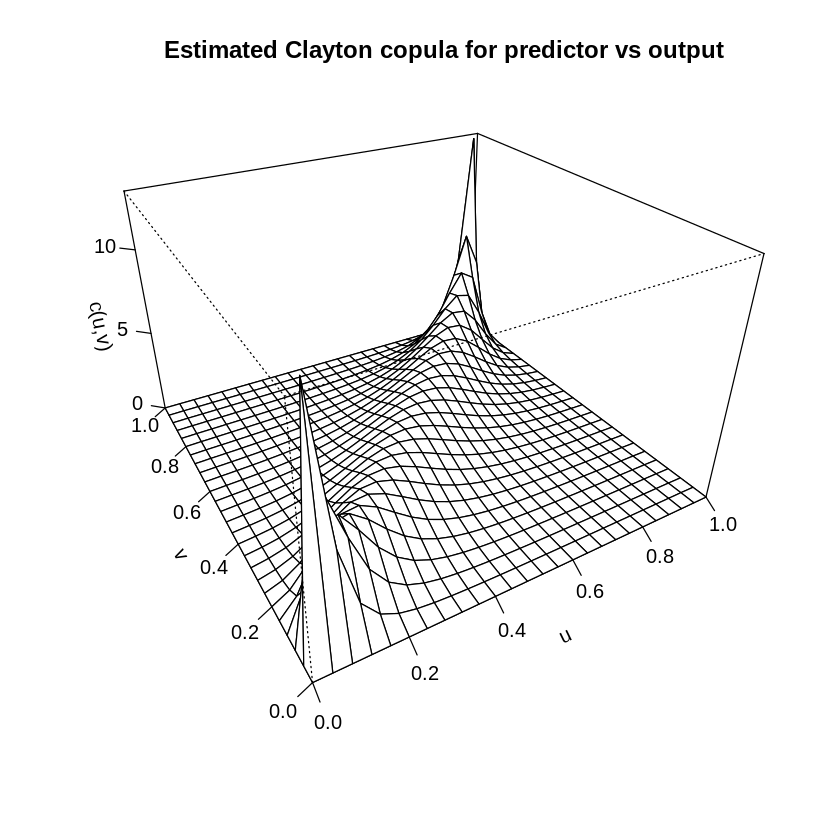

In [162]:
t_copula@parameters<-best_parameters
persp(t_copula, dCopula, main="Estimated Clayton copula for predictor vs output",xlab="u", ylab="v", zlab="c(u,v)")

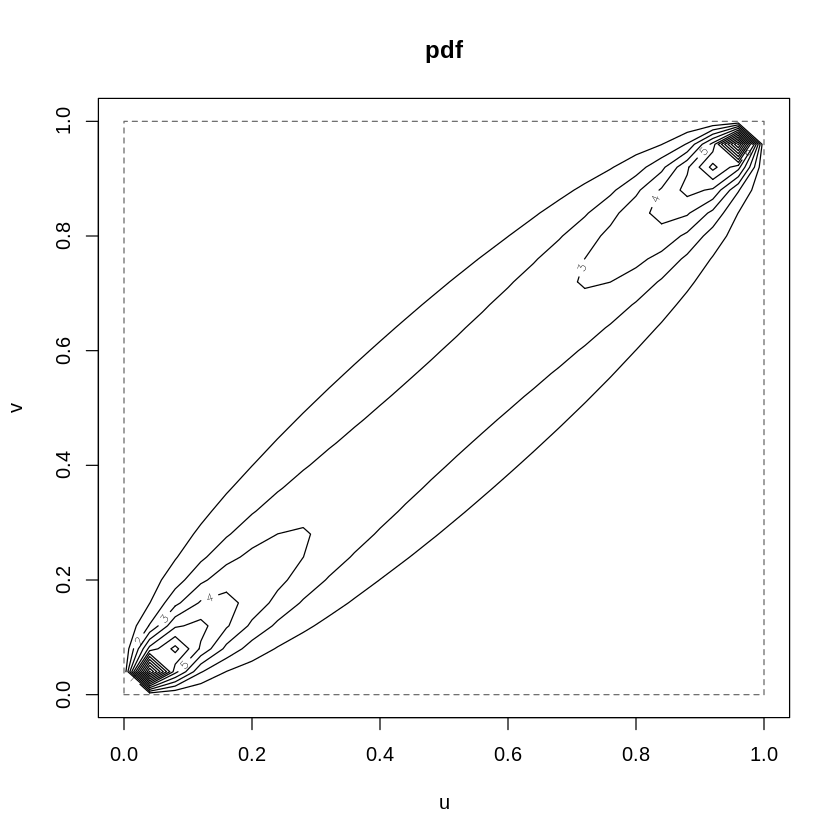

In [163]:
contour(t_copula,dCopula, main="pdf",xlab="u", ylab="v")

In [164]:
data$predictor_DistrType

[1] "normal"

In [165]:
data$predictor_DistrParameters


[1] 90  1

In [166]:
data$output_DistrType

[1] "exponential"

In [167]:
data$output_DistrParameters

[1] 1.0 0.4

In [180]:
predictor.copula <- pnorm(data$predictor, data$predictor_DistrParameters[1], data$predictor_DistrParameters[2])
output.copula <- pexp(data$output, rate = data$output_DistrParameters[2])

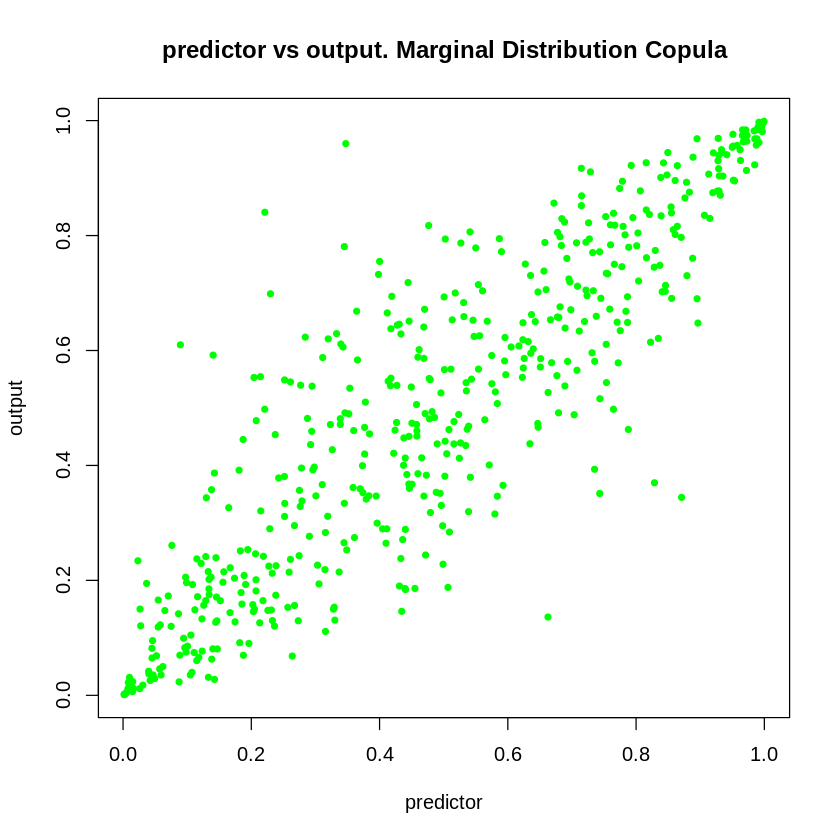

In [181]:
plot(predictor.copula,output.copula,main = 'predictor vs output. Marginal Distribution Copula', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')

In [183]:
quantileLevel <- function(numCopula,copula, theta,alpha)
{
  if (numCopula == 1)
  {
#Gaussian
    q <- pnorm(qnorm(alpha) *sqrt(1-theta*theta)  + theta* qnorm(copula[,1]))
  }
  if (numCopula == 2)
  {
    rho =  theta[1]
    nu =  theta[2]
    u = copula[,1]
    t_alpha <- qt(alpha, df = nu + 1)
    t_inv_u <- qt(u, df = nu)
    sqrt_term <- sqrt((nu + t_inv_u^2) * (1 - rho^2) / (nu + 1))
    q <- pt((t_alpha * sqrt_term + rho * t_inv_u), df = nu)
      #Student
  }
  if (numCopula == 3)
  {
    #Frank
  }
  if (numCopula == 4)
  {
    #Clayton
    q <- ((alpha^(-theta/(1 + theta)) - 1) * (copula[,1]^(-theta)) + 1)^(-1/theta)
  }
  return(q)
}
copula <- cbind(predictor.copula,output.copula)
alpha <- 0.95
copulanum <- 2
parameters <- my.t_copula.fit@copula@parameters
quantile <- quantileLevel(copulanum,copula, parameters,alpha)

In [184]:
(anomalindex <- which(copula[,2]>quantile))

[1]  20  65  66  80  83 150 163 167 234 266 284 334 434 435 437 445 451 462 467
[20] 474 476 488 499

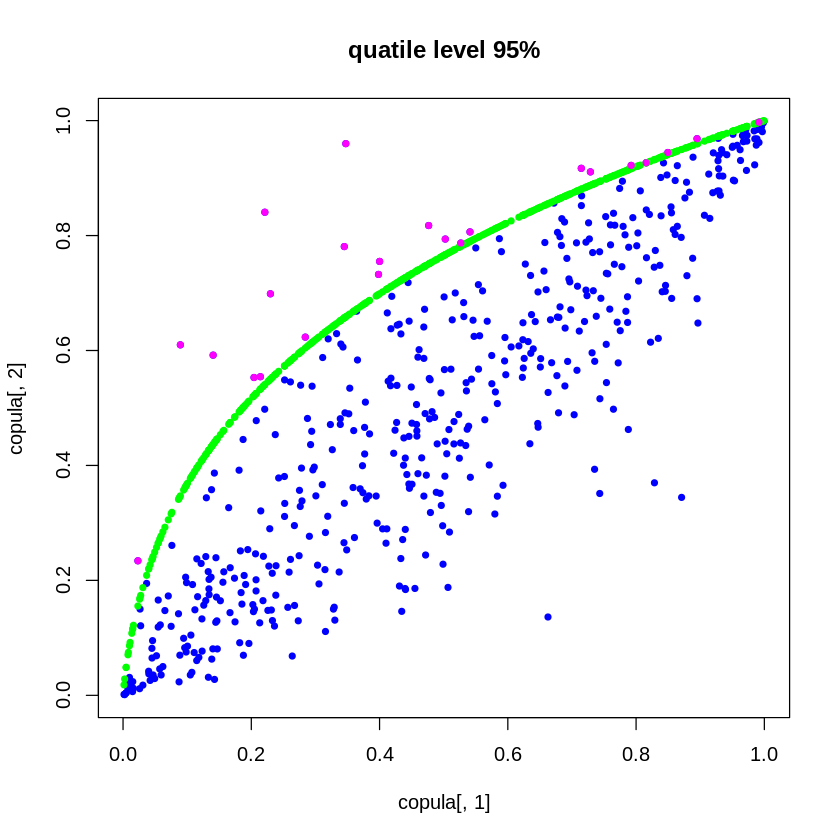

In [185]:
plot(copula[,1],copula[,2],pch =20,col = "blue",main = "quatile level 95%")
points(copula[,1],quantile,col = "green",pch = 20)
points(copula[anomalindex,1],copula[anomalindex,2],col = "magenta",pch = 20)

In [186]:
anomal_predictor <- data$predictor[anomalindex]
anomal_output    <- data$output[anomalindex]
head(anomal_predictor)

[1] 88.92181 88.00738 89.74682 90.56673 90.06715 89.94114

In [187]:
head(anomal_output)

[1] 2.240784 0.666736 3.515984 6.221866 3.866088 4.251668

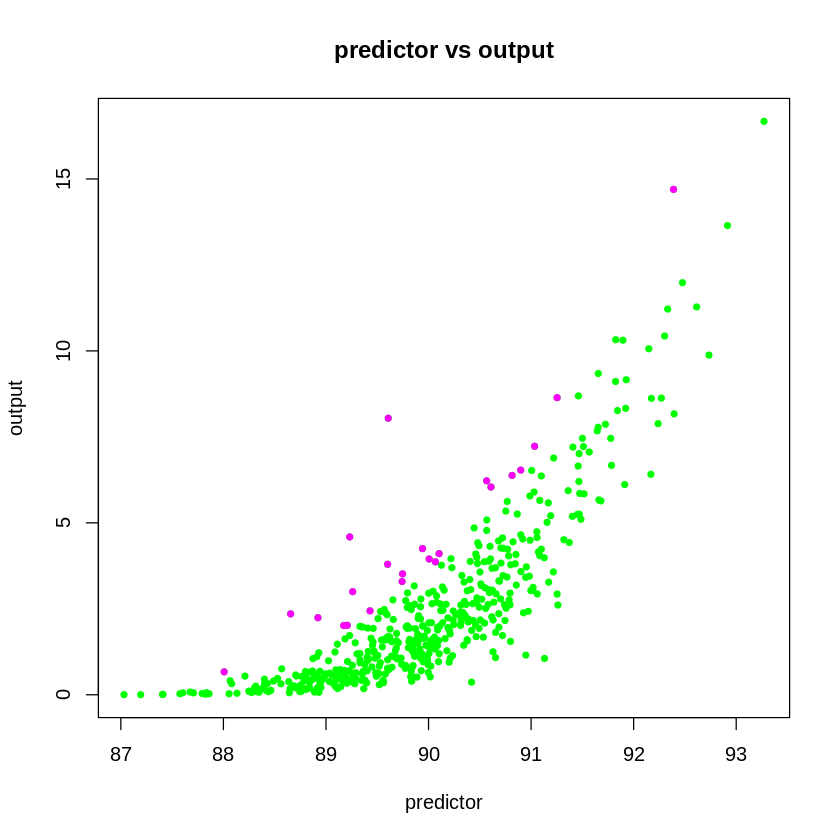

In [188]:
plot(data$predictor,data$output,main = 'predictor vs output', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')
points(data$predictor[anomalindex],data$output[anomalindex],col = "magenta",pch = 20)


In [189]:
variant <- 11

In [190]:
copulaNames <- c("normal", "student","frank","clayton")
copulaName <-copulaNames[copulanum]
copulaName

[1] "student"

In [191]:
myResult <- list(variant = variant,
                 copulaName = copulaName,
                 predictor.copula = predictor.copula,
                 output.copula = output.copula,
                 best_parameters = best_parameters,
                 anomal_predictor= anomal_predictor,
                 anomal_output= anomal_output)

saveRDS(myResult,"result.rds")